Decision Tree

In [ ]:
%pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("bioactivity_data_3class_pIC50.csv")

In [ ]:
df.shape

(65, 9)

In [ ]:
df.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL191881,CC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)...,active,426.562,0.01507,6.0,5.0,7.060481
1,1,CHEMBL374508,CC(C)C[C@H](NC(=O)[C@H]1O[C@@H]1C(=O)O)C(=O)NC...,active,357.411,-1.46090,5.0,5.0,6.317404
2,2,CHEMBL1689603,CC(C)CCNC(=O)[C@H](CC(C)C)NC=C1C(=O)Nc2ccccc21,inactive,343.471,3.14620,3.0,3.0,4.301030
3,3,CHEMBL1689604,CC(C)CCNC(=O)[C@H](CC(C)C)NC=C1C(=O)Nc2ccc(Cl)...,inactive,377.916,3.79960,3.0,3.0,4.301030
4,4,CHEMBL1689605,CC(C)CCNC(=O)[C@H](CC(C)C)NC=C1C(=O)Nc2cc(Cl)c...,inactive,377.916,3.79960,3.0,3.0,4.301030


In [ ]:
df.tail()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
60,60,CHEMBL4582464,CC(C(=O)N1c2ccccc2CCc2ccccc21)n1nnc(-c2ccc(N3C...,intermediate,480.572,4.2012,0.0,7.0,5.175874
61,61,CHEMBL4451728,COc1ccc(NC(=O)Cn2nnc(-c3ccccc3NC(=O)c3cc(OC)cc...,intermediate,488.504,3.2569,2.0,9.0,5.175874
62,62,CHEMBL1302947,O=C(Cn1nnc(-c2ccccc2)n1)NNC(=O)c1ccco1,intermediate,312.289,0.3943,2.0,7.0,5.175874
63,63,CHEMBL4646055,CN1CCCc2cc(CCNC(=O)C(=O)Nc3ccc4c(c3)OCO4)ccc21,intermediate,381.432,2.0951,2.0,5.0,5.000869
64,64,CHEMBL4637201,O=C(NCCCNC(=O)c1cc2ccccc2[nH]1)c1ccc(-c2ccccc2...,intermediate,397.478,4.3848,3.0,2.0,5.067526


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          65 non-null     int64  
 1   molecule_chembl_id  65 non-null     object 
 2   canonical_smiles    65 non-null     object 
 3   class               65 non-null     object 
 4   MW                  65 non-null     float64
 5   LogP                65 non-null     float64
 6   NumHDonors          65 non-null     float64
 7   NumHAcceptors       65 non-null     float64
 8   pIC50               65 non-null     float64
dtypes: float64(5), int64(1), object(3)
memory usage: 4.7+ KB


In [ ]:
df.describe()

,Unnamed: 0,MW,LogP,NumHDonors,NumHAcceptors,pIC50
count,65.00000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,32.00000,545.833631,3.552997,3.046154,6.138462,5.270760
std,18.90767,196.489394,1.665719,1.545465,1.878138,0.967367
min,0.00000,287.363000,-1.460900,0.000000,2.000000,4.301030
25%,16.00000,411.933000,2.760500,2.000000,5.000000,4.301030
50%,32.00000,470.591000,3.684200,3.000000,6.000000,5.175874
75%,48.00000,778.870000,4.619320,5.000000,8.000000,6.267606
max,64.00000,915.108000,6.805000,6.000000,9.000000,7.221849


In [ ]:
df.isnull()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
60,False,False,False,False,False,False,False,False,False
61,False,False,False,False,False,False,False,False,False
62,False,False,False,False,False,False,False,False,False
63,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Unnamed: 0            0
molecule_chembl_id    0
canonical_smiles      0
class                 0
MW                    0
LogP                  0
NumHDonors            0
NumHAcceptors         0
pIC50                 0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

(array([23.,  3., 17.,  1.,  1.,  1.,  9.,  1.,  3.,  6.]),
 array([4.30103   , 4.59311187, 4.88519375, 5.17727562, 5.4693575 ,
        5.76143937, 6.05352125, 6.34560312, 6.637685  , 6.92976687,
        7.22184875]),
 <BarContainer object of 10 artists>)

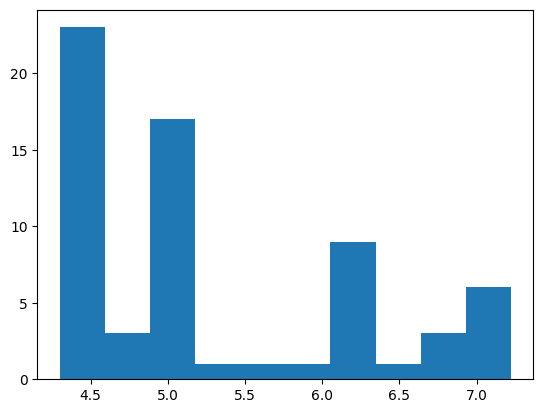

In [ ]:
plt.hist(df["pIC50"])

In [ ]:
X=df.iloc[:, :-1]
Y=df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=100)

In [ ]:
X_train.shape

(48, 8)

In [ ]:
Y_train.shape

(48,)

In [ ]:
#from sklearn.tree import DecisionTreeRegressor
#reg=DecisionTreeRegressor(criterion="mse",max_depth=10,min_samples_split=10,random_state=5)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

# Assuming 'X_train' is your feature matrix and 'Y_train' is your target variable

# Convert any non-numeric columns in X_train to numeric using LabelEncoder
le = LabelEncoder()
X_train = X_train.apply(lambda col: le.fit_transform(col.astype(str)) if col.dtype == object else col)

# Convert Y_train to numeric if it contains string values
Y_train = Y_train.astype(float)

reg = DecisionTreeRegressor(criterion="squared_error", max_depth=10, min_samples_split=10, random_state=5)

# Now you can proceed with fitting the Ridge model
reg.fit(X_train, Y_train)


DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=5)

In [ ]:
print(X_test.dtypes)


Unnamed: 0              int64
molecule_chembl_id      int64
canonical_smiles        int64
class                   int64
MW                    float64
LogP                  float64
NumHDonors            float64
NumHAcceptors         float64
dtype: object


In [ ]:
le = LabelEncoder()
for col in X_test.columns:
    if X_test[col].dtype == object:
        X_test[col] = le.fit_transform(X_test[col].astype(str))


In [ ]:
for col in X_train.columns:
    if X_train[col].dtype == object:
        X_train[col] = le.fit_transform(X_train[col].astype(str))


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#from sklearn.tree import  DecisionTreeRegressor

# Assuming 'X_test' is your test feature matrix

# Convert any non-numeric columns in X_test to numeric using LabelEncoder
#le = LabelEncoder()
#X_test = X_test.apply(lambda col: le.fit_transform(col.astype(str)) if col.dtype == object else col)

In [ ]:
reg = DecisionTreeRegressor(criterion="squared_error", max_depth=10, min_samples_split=10, random_state=5)
# Now you can proceed with predicting using the Decision tree model
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)


In [ ]:
Y_pred

array([6.49967315, 4.30103   , 5.08512818, 5.17587417, 5.17587417,
       4.30103   , 6.49967315, 4.30103   , 4.30103   , 5.00086946,
       6.49967315, 4.30103   , 4.30103   , 5.17587417, 5.17587417,
       6.49967315, 4.30103   ])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error (Y_test,Y_pred)

0.07152426719657082

In [ ]:
np.sqrt(mean_squared_error (Y_test,Y_pred))

0.2674402123775907

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg,X_train,Y_train,cv=10)

array([ 0.84509145,  0.91282637,  0.96747537,  0.76849209,  0.85119591,
        0.97642182,  0.72923113,  0.99079307,  0.98477874, -0.52992144])

In [ ]:
rsquared = reg.score(X_test, Y_test)
print("R-squared: %.2f" % rsquared)

R-squared: 0.91
